# Targeted Marketing Campaign

### Using Clustering algorithm and Visualization tool

![image.png](https://raw.githubusercontent.com/nadarsubash/articles/master/aim-bullseye-dart-small.jpg)
*Photo by Skitterphoto from Pexels*

### What is Targeted Marketing Campaign?

Targeted Marketing Campaing is an exercise of identifying group of customers who are more likely to react positively to a given event/campaign than others. This helps in focussed marketing and higher yield per campaign

This helps companies in general in:<br>
1) Reducing the cost & efforts of marketing <br>
2) Being relevant to the customer by not pushing products/service customer is not likely to buy

### What is Clustering?

Cluster analysis or Clustering is the process of grouping a set of objects *(or Customers in Marketing parlance)* in such a way that objects in the same group have similar characteritics *(like buying patterns or social/economic strata, gender etc)* to each other 

In this exercise, we shall be using KMeans Cluster Algorithm.<br>
This is part of the Unsupervised Learning family of the Machine Learning. You may refer to my [post here](https://www.kaggle.com/nadarsubash/kmeans-clustering-in-theory-hands-on-python) to learn indepth about KMeans Cluster Analysis

### Let's see how Analytics (*read Clustering Algorithm*) can help companies build a Targeted Marketing Campaign

In this exercise, we are aiming to build pattern around customer buying behaviour and then recommend targetted marketing campaign. <br>
We are using freely available data for Wholesale customers from UCI Machine Learning Repository <br>
*You can find the data [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers)*

#### First let's import all the Libraries required to build the algorithm

In [6]:
import pandas as pd  #to read and process the file
#import numpy as np
from sklearn.cluster import KMeans #package with built-in K-Means algorithm 
import matplotlib.pyplot as plt  #to build graphs which will help with identification of optimum number of clusters

#### Now Load the Dataset

In [7]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv")

Let's see basic characteristics of the data

In [8]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [9]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


#### We have to now decide what kind of pattern we should look for. Basis that, we select the appropriate fields in the file for further processing

From the details above, we see that we may get some buying patter based on either:<br>
1) Region <br>
2) Channel of customer touch point and <br>
3) various category of products

##### For this exercise, we shall take the product category to form buying patter

Let's remove the fields not required for the clustering analysis, i.e. Channel and Region

In [10]:
X = data.drop(columns=["Channel", "Region"])

In [11]:
X.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


#### Check for Unfilled cells to ensure they don't influence the outcome

In [12]:
print(X.isna().head())
print(X.isna().sum())

   Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  False  False    False   False             False       False
1  False  False    False   False             False       False
2  False  False    False   False             False       False
3  False  False    False   False             False       False
4  False  False    False   False             False       False
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


Everything looks great! Let's dive into building the algorithm now

### Find the optimal cluster numbers K, using WCSS plot

##### The within-cluster sum of squares is a measure of the variability of the observations within each cluster. In general, a cluster that has a small sum of squares is more compact than a cluster that has a large sum of squares
###### @minitab

WCSS is computed as:<br>
$$WCSS=\sum_{i=1}^k(\sum_{j=1}^n (X_{j}-C_{i})^2)$$  <br>
*where:* <br>
*$C_{k}$ is centroid for observation $X_{i}$* <br>
*k is number of centroids* <br>
*n is number of objects within respective centroid* <br>

*You may refer to my [post here](https://www.kaggle.com/nadarsubash/kmeans-clustering-in-theory-hands-on-python) to understand WCSS in detail*

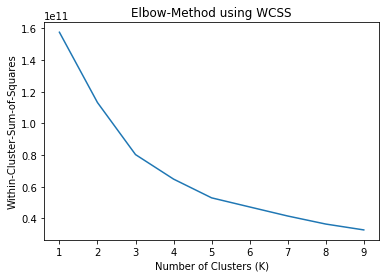

In [13]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Elbow-Method using WCSS')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster-Sum-of-Squares')
plt.show()

#### Drop in WCSS reduces significantly at 5. Hence we consider optimum k to be 5

In [14]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [15]:
clusters = kmeans.predict(X)

In [16]:
Xk = X
Xk['Cluster']=clusters #adding column with cluster number to the dataset

In [17]:
Xk.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,12669,9656,7561,214,2674,1338,3
1,7057,9810,9568,1762,3293,1776,3
2,6353,8808,7684,2405,3516,7844,3
3,13265,1196,4221,6404,507,1788,3
4,22615,5410,7198,3915,1777,5185,2


Let's see how does the cluster segregation looks:

In [18]:
Xk['Cluster'].value_counts()

3    226
2    104
0     81
1     22
4      7
Name: Cluster, dtype: int64

##### We see that out of 440 transactions, 226 *(almost 50%)* is tagged to cluster **3**

In [19]:
Xk.sum(axis=0)

Fresh               5280131
Milk                2550357
Grocery             3498562
Frozen              1351650
Detergents_Paper    1267857
Delicassen           670943
Cluster                 936
dtype: int64

##### Fresh products seem to be the highest selling category, followed by Grocery

#### We now export the clustered transaction file so that bar plot of the product sale can be visualized clusterwise to analyse the cluster wise trend

In [20]:
Xk.to_csv('Cust_Segmentation_ClusterWise.csv')

### What is Visualization?

Data visualization is nothing but graphical representation of the data, typically in the form of graphs and charts. This would in turn aid understanding the trends, outliers and patterns in the data.

There are various tools available in the market, free and paid like Tableau, Qlik Sense, AWS Quiksight, Google DataStudio etc. For this exercise, we are using Tableau Public

#### Steps involved in building Tableau viz for Customer Segmentation:
1) **Load** the 'Cust_Segmentation_ClusterWise.csv' file in the 'Data Source' tab<br>
2) Go to **'Sheet 1'**<br>
3) Add 'Delicassen' to Row. This would automatically create a **Bar chart** with Sum(Delicassen) as row<br>
4) Now add 'Clusters' field to Columns. This will create view of Delicassen split **clusterwise**<br>
5) Now add all the other fields, one-by-one, to the Columns in view part of the sheet (and not shelve). This creates **sub-groups** of all the product category, clusterwise. In Tableau terms, Measure Values<br>
6) Add 'Clusters' to **Color Marks**<br>
7) Select: Analysis -> **Percentage of** -> Table. This would give % of respective product category across the table. So you would see which gourp is the higest/lowest spender of specific category<br>
8) Show **Mark label** will then display the % for each category

##### voila, your visualization is ready!!

In [21]:
%%HTML
<div class='tableauPlaceholder' id='viz1571411532466' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Cu&#47;CustomerAnalytics_15713293789760&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='CustomerAnalytics_15713293789760&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Cu&#47;CustomerAnalytics_15713293789760&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1571411532466');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### Now that the visualization is ready, time to put on your Business Analytics hat!

Here are some of the findings:<br>
1) Cluster 0: **Discounts on Fresh and Frozen product to be offered** as there is a low buying in these product categories. <br>
2) Cluster 1 & 4 is a very small sized population (6.6% of total Customers) and hence can be skipped <br>
3) Cluster 2: Seems to be antonym of Cluster 0. Highest buying in Fresh and Frozen, followed by Delicassen. **Promotions to be offered on Detergent, Milk and Grocery products**<br>
4) Cluster 3: **Loyal Customers**. Highest spendings across the category. Special promotions like early early peek to the promotion events, special offers on new launches etc to build premium customer segment

##### Feel free to share your suggestions on any other observations

This brings to the conclution of this article. Any suggestion or advise is most welcome! 

##### Below sharing the visualization created on AWS QuickSight
![](https://raw.githubusercontent.com/nadarsubash/articles/master/Cust_Seg_ClusterWise.jpg)